**Corpus to train**

In [2]:
#read the corpus(this is a sample file, upload task specific corpus in corpus text file and proceed)

corpus=open("corpus2.txt",encoding="UTF-8").read()

In [3]:
corpus

'\ufeffTo Sherlock Holmes she is always _the_ woman. I have seldom heard him\nmention her under any other name. In his eyes she eclipses and\npredominates the whole of her sex. It was not that he felt any emotion\nakin to love for Irene Adler. All emotions, and that one particularly,\nwere abhorrent to his cold, precise but admirably balanced mind. He\nwas, I take it, the most perfect reasoning and observing machine that\nthe world has seen, but as a lover he would have placed himself in a\nfalse position. He never spoke of the softer passions, save with a gibe\nand a sneer. They were admirable things for the observer—excellent for\ndrawing the veil from men’s motives and actions. But for the trained\nreasoner to admit such intrusions into his own delicate and finely\nadjusted temperament was to introduce a distracting factor which might\nthrow a doubt upon all his mental results. Grit in a sensitive\ninstrument, or a crack in one of his own high-power lenses, would not\nbe more distur

In [4]:
#preprocess the corpus
import re
corpus=corpus.lower()
clean_corpus=re.sub('[^a-z0-9]+',' ', corpus)

In [5]:
clean_corpus

' to sherlock holmes she is always the woman i have seldom heard him mention her under any other name in his eyes she eclipses and predominates the whole of her sex it was not that he felt any emotion akin to love for irene adler all emotions and that one particularly were abhorrent to his cold precise but admirably balanced mind he was i take it the most perfect reasoning and observing machine that the world has seen but as a lover he would have placed himself in a false position he never spoke of the softer passions save with a gibe and a sneer they were admirable things for the observer excellent for drawing the veil from men s motives and actions but for the trained reasoner to admit such intrusions into his own delicate and finely adjusted temperament was to introduce a distracting factor which might throw a doubt upon all his mental results grit in a sensitive instrument or a crack in one of his own high power lenses would not be more disturbing than a strong emotion in a nature 

 **Data Preparation**

In [6]:

#required libraries
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
#tokenizing the text into words
tokens = word_tokenize(clean_corpus)
tokens


['to',
 'sherlock',
 'holmes',
 'she',
 'is',
 'always',
 'the',
 'woman',
 'i',
 'have',
 'seldom',
 'heard',
 'him',
 'mention',
 'her',
 'under',
 'any',
 'other',
 'name',
 'in',
 'his',
 'eyes',
 'she',
 'eclipses',
 'and',
 'predominates',
 'the',
 'whole',
 'of',
 'her',
 'sex',
 'it',
 'was',
 'not',
 'that',
 'he',
 'felt',
 'any',
 'emotion',
 'akin',
 'to',
 'love',
 'for',
 'irene',
 'adler',
 'all',
 'emotions',
 'and',
 'that',
 'one',
 'particularly',
 'were',
 'abhorrent',
 'to',
 'his',
 'cold',
 'precise',
 'but',
 'admirably',
 'balanced',
 'mind',
 'he',
 'was',
 'i',
 'take',
 'it',
 'the',
 'most',
 'perfect',
 'reasoning',
 'and',
 'observing',
 'machine',
 'that',
 'the',
 'world',
 'has',
 'seen',
 'but',
 'as',
 'a',
 'lover',
 'he',
 'would',
 'have',
 'placed',
 'himself',
 'in',
 'a',
 'false',
 'position',
 'he',
 'never',
 'spoke',
 'of',
 'the',
 'softer',
 'passions',
 'save',
 'with',
 'a',
 'gibe',
 'and',
 'a',
 'sneer',
 'they',
 'were',
 'admirable

In [8]:
#length of the sequence to train
train_len = 3

In [9]:
#converting the data into required sequence
text_sequences = []
for i in range(train_len,len(tokens)+1):
  seq = tokens[i-train_len:i]
  text_sequences.append(seq)

In [10]:

text_sequences

[['to', 'sherlock', 'holmes'],
 ['sherlock', 'holmes', 'she'],
 ['holmes', 'she', 'is'],
 ['she', 'is', 'always'],
 ['is', 'always', 'the'],
 ['always', 'the', 'woman'],
 ['the', 'woman', 'i'],
 ['woman', 'i', 'have'],
 ['i', 'have', 'seldom'],
 ['have', 'seldom', 'heard'],
 ['seldom', 'heard', 'him'],
 ['heard', 'him', 'mention'],
 ['him', 'mention', 'her'],
 ['mention', 'her', 'under'],
 ['her', 'under', 'any'],
 ['under', 'any', 'other'],
 ['any', 'other', 'name'],
 ['other', 'name', 'in'],
 ['name', 'in', 'his'],
 ['in', 'his', 'eyes'],
 ['his', 'eyes', 'she'],
 ['eyes', 'she', 'eclipses'],
 ['she', 'eclipses', 'and'],
 ['eclipses', 'and', 'predominates'],
 ['and', 'predominates', 'the'],
 ['predominates', 'the', 'whole'],
 ['the', 'whole', 'of'],
 ['whole', 'of', 'her'],
 ['of', 'her', 'sex'],
 ['her', 'sex', 'it'],
 ['sex', 'it', 'was'],
 ['it', 'was', 'not'],
 ['was', 'not', 'that'],
 ['not', 'that', 'he'],
 ['that', 'he', 'felt'],
 ['he', 'felt', 'any'],
 ['felt', 'any', 'emoti

In [11]:
#converting the texts into integer sequence
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_sequences)
sequences = tokenizer.texts_to_sequences(text_sequences)
sequences

[[4, 118, 27],
 [118, 27, 34],
 [27, 34, 14],
 [34, 14, 176],
 [14, 176, 1],
 [176, 1, 135],
 [1, 135, 3],
 [135, 3, 16],
 [3, 16, 900],
 [16, 900, 103],
 [900, 103, 35],
 [103, 35, 1883],
 [35, 1883, 41],
 [1883, 41, 224],
 [41, 224, 112],
 [224, 112, 74],
 [112, 74, 263],
 [74, 263, 8],
 [263, 8, 13],
 [8, 13, 142],
 [13, 142, 34],
 [142, 34, 1884],
 [34, 1884, 2],
 [1884, 2, 1885],
 [2, 1885, 1],
 [1885, 1, 225],
 [1, 225, 5],
 [225, 5, 41],
 [5, 41, 1886],
 [41, 1886, 7],
 [1886, 7, 12],
 [7, 12, 19],
 [12, 19, 9],
 [19, 9, 10],
 [9, 10, 367],
 [10, 367, 112],
 [367, 112, 1222],
 [112, 1222, 1223],
 [1222, 1223, 4],
 [1223, 4, 402],
 [4, 402, 20],
 [402, 20, 226],
 [20, 226, 240],
 [226, 240, 47],
 [240, 47, 1887],
 [47, 1887, 2],
 [1887, 2, 9],
 [2, 9, 48],
 [9, 48, 1224],
 [48, 1224, 52],
 [1224, 52, 1888],
 [52, 1888, 4],
 [1888, 4, 13],
 [4, 13, 531],
 [13, 531, 1889],
 [531, 1889, 23],
 [1889, 23, 901],
 [23, 901, 1890],
 [901, 1890, 157],
 [1890, 157, 10],
 [157, 10, 12],
 [1

In [12]:

sequences=np.asarray(sequences)

In [13]:
#vocabulary size
vocabulary_size = len(tokenizer.word_counts)+1
vocabulary_size

3965

In [14]:
#trainX
train_inputs=sequences[:,:-1]

In [15]:
train_inputs

array([[  4, 118],
       [118,  27],
       [ 27,  34],
       ...,
       [ 91,  20],
       [ 20,  11],
       [ 11,   2]])

In [16]:
#input sequence length 
seq_length=train_inputs.shape[1]
seq_length

2

In [17]:
#trainY
train_targets=sequences[:,-1]

In [18]:

train_targets

array([27, 34, 14, ..., 11,  2, 25])

In [19]:
#one hot encoding
train_targets = to_categorical(train_targets, num_classes=vocabulary_size)

In [20]:
train_targets

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

**Let's build the model!**

In [21]:
#required libraries
import torch
from torch.optim import Adam
import torch.nn as nn

In [22]:
#lstm model
class lstm(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size):
        super().__init__()
        #simple lookup table that stores embeddings of a fixed dictionary and size.
        self.embed = nn.Embedding(vocab_size, embed_size)
        
        #lstm 
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers=2, bidirectional=False)
        
        #fully connected layer
        self.linear = nn.Linear(hidden_size*seq_length,vocab_size)
    
    def forward(self, input_word):
        #input sequence to embeddings
        embedded = self.embed(input_word)
        
        #passing the embedding to lstm model
        output, hidden = self.lstm(embedded)
        
        #reshaping
        output=output.view(output.size(0), -1)
        
        #fully connected layer
        output = self.linear(output)
        return output,hidden



In [23]:

model=lstm(vocab_size=vocabulary_size,embed_size=128, hidden_size=256)

In [24]:
model

lstm(
  (embed): Embedding(3965, 128)
  (lstm): LSTM(128, 256, num_layers=2)
  (linear): Linear(in_features=512, out_features=3965, bias=True)
)

In [25]:

#Adam optimizer
optimizer= Adam(model.parameters(), lr=0.07)

#loss
criterion = nn.BCEWithLogitsLoss()

In [27]:
#training the model
def train(epoch):
    #set the model to train
    model.train()
    tr_loss=0    
    
    #clearing the Gradients 
    optimizer.zero_grad()
    
    #predict the output
    y_pred, (state_h, state_c) = model(torch.from_numpy(train_inputs))
    
    #compute the loss
    loss=criterion(y_pred,torch.from_numpy(train_targets))
    losses.append(loss)
    
    #backpropagate
    loss.backward()

    #update the parameters
    optimizer.step()
    tr_loss = loss.item()

    torch.save(model, f"model-{epoch}.pt")

    print("Epoch : ",epoch,"loss : ",loss)

In [28]:
#number of epoch
no_epoch=10
losses=[]
for epoch in range(1,no_epoch+1):
    train(epoch)

Epoch :  1 loss :  tensor(0.6933, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  2 loss :  tensor(0.0039, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  3 loss :  tensor(0.0030, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  4 loss :  tensor(0.0122, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  5 loss :  tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  6 loss :  tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  7 loss :  tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  8 loss :  tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  9 loss :  tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)
Epoch :  10 loss :  tensor(nan, grad_fn=<BinaryCrossEntropyWithLogitsBackward0>)


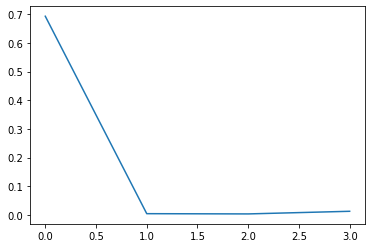

In [29]:
#plotting the loss, loss is decreasing for each epoch
import matplotlib.pyplot as plt
plt.plot(losses, label='Training loss')
plt.show()

**Prediction**

In [44]:
def predict_next_word(text):
    global model
    #set the model to evaluation
    model = torch.load("model-3.pt")

    #preprocess
    text = text.lower().strip()
    
    #converting the text to word tokens
    input_tokens = word_tokenize(text)
    
    #converting the tokens to integer sequence
    sequences = tokenizer.texts_to_sequences([input_tokens])
    
    #converting to array
    sequences=np.asarray(sequences)
    with torch.no_grad():
        #converting to tensor
        sequences=torch.from_numpy(sequences)
        #predicting the output
        predict,(hidden,cell)=model(sequences)
    
    #applying the softmax layer
    softmax = torch.exp(predict)
    prob = list(softmax.numpy())
    
    #index of the predict word
    predictions = np.argmax(prob)

    #converting the sequence back to word
    next_word=tokenizer.sequences_to_texts([[predictions]])
    return next_word

*Example-1*

In [45]:

#we trained our model with sequence length of 2
input_text="next word"

In [46]:
print("Possible next word will be:")
predict_next_word(input_text)

Possible next word will be:


['to']

*Example-2*

In [59]:
#we trained our model with sequence length of 2
input_text="It never went that"

In [60]:
print("Possible next word will be:")
predict_next_word(input_text)

Possible next word will be:


RuntimeError: ignored